In [35]:
# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"/Users/mayuresh/Desktop/indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"/Users/mayuresh/Desktop/indic_nlp_resources"

import sys
import pandas as pd
import numpy as np
import warnings
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from indicnlp import common
from indicnlp import loader
from indicnlp.tokenize import indic_tokenize
from indicnlp.tokenize import indic_tokenize 
from indicnlp.morph import unsupervised_morph 
from indicnlp import common

sys.path.append(r'{}'.format(INDIC_NLP_LIB_HOME))

common.set_resources_path(INDIC_NLP_RESOURCES)

loader.load()


In [2]:
training_dataset = pd.read_csv("/Users/mayuresh/Desktop/MOLD/Mold/MOLD_Training2.csv")
training_dataset.head()
training_dataset.dropna()
training_dataset['subtask_c'].fillna("NULL")

0       GRP
1       GRP
2       GRP
3       GRP
4       GRP
       ... 
2493    OTH
2494    OTH
2495    OTH
2496    OTH
2497    OTH
Name: subtask_c, Length: 2498, dtype: object

In [3]:
tweets = training_dataset["tweet"]
tweets

0       राम कदम वागण्यात नाही तर बोलण्यात चुकला  बीजेप...
1       हीच का तुमची शिवसेने चि शिकवण... आपली आई म्हणज...
2       हे वाचा गाढवांनो. आणि हे ही सांगा की तुमच्या म...
3              भक्त आंधळे असतात. मूर्खा ना काही कळत नाही.
4       १९६६ साली छत्रपती शिवाजी महाराज या जागतिक दर्ज...
                              ...                        
2493     पण बरेच जण जन्मजात मंद   मूर्ख आणि अंधभक्त अस...
2494     कर्नाटक मध्ये जेव्हा छत्रपती शिवाजी महाराजांच...
2495     मंद...सत्तेचे लालची तुम्ही म्हणून आज गुंडांना...
2496                           आयटी सेल वाले दळभद्री 🤣🤣🤣 
2497     मविआ चे चाटे काय गोट्या चोळत बसले काय नेत्यां...
Name: tweet, Length: 2498, dtype: object

In [4]:
level_A = training_dataset[["subtask_a"]]
level_B = training_dataset.query("subtask_a == 'Offensive'")[["subtask_b"]]
level_C = training_dataset.query("subtask_b == 'TIN'")[["subtask_c"]]

In [6]:
stopwords_file = open("/Users/mayuresh/Desktop/MOLD/Mold/stopwords.txt")
stopwords = stopwords_file.read().splitlines()
print(stopwords)

['अधिक ', 'अनेक ', 'अशी ', 'असलयाचे', 'असलेल्या', 'असा', 'असून', 'असे', 'आज', 'आणि', 'आता', 'आपल्या', 'आला', 'आली', 'आले', 'आहे', 'आहेत', 'एक', 'एका', 'कमी', 'करणयात', 'करून', 'का', 'काम', 'काय', 'काही', 'किवा', 'की', 'केला', 'केली', 'केले', 'कोटी', 'गेल्या', 'घेऊन', 'जात', 'झाला', 'झाली', 'झाले', 'झालेल्या', 'टा', 'डॉ', 'तर', 'तरी', 'तसेच', 'ता', 'ती', 'तीन', 'ते', 'तो', 'त्या', 'त्याचा', 'त्याची', 'त्याच्या', 'त्याना', 'त्यानी', 'त्यामुळे', 'त्री', 'दिली', 'दोन', 'न', 'नाही', 'निर्ण्य', 'पण', 'पम', 'परयतन', 'पाटील', 'म', 'मात्र', 'माहिती', 'मी', 'मुबी', 'म्हणजे', 'म्हणाले', 'म्हणून', 'या', 'याचा', 'याची', 'याच्या', 'याना', 'यानी', 'येणार', 'येत', 'येथील', 'येथे', 'लाख', 'व', 'व्यकत', 'सर्व', 'सागित्ले', 'सुरू', 'हजार', 'हा', 'ही', 'हे', 'होणार', 'होत', 'होता', 'होती', 'होते']


In [17]:
def clean(tweet):
    removal_list = ['URL','\'ve','n\'t','\'s','\'m','!']
    for element in removal_list:
        tweet = str(tweet).replace(element,'')
    
    return tweet

In [18]:
# for tweet in tweets:
#     tweet = remove_noise(str(tweet))
iterator_map = map(clean,tweets)
tweets = list(iterator_map)

In [20]:
  

collective_tweets = copy.deepcopy(training_dataset)

In [21]:


analyzer=unsupervised_morph.UnsupervisedMorphAnalyzer('mr')


In [22]:
def tokenize(tweet):
    return indic_tokenize.trivial_tokenize(tweet)

def morph(tweet):
    analyzed_tokens=analyzer.morph_analyze_document(str(tweet).split(' '))
    return analyzed_tokens

In [24]:
tqdm.pandas(desc="Tokenize..")
#all_tweets["tokens"] = all_tweets['tweet'].progress_apply(tokenize)
collective_tweets["tokens"] = collective_tweets['tweet'].progress_apply(morph)

/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
Tokenize..: 100%|██████████| 2498/2498 [00:01<00:00, 2392.54it/s]


In [26]:
vector = collective_tweets["tokens"].tolist()

In [28]:
def tfid_vectorizer(vector):
	## Creates and stores an instance of the TfidfVectorizer class. This will be used further to extract our data as tf-idf features.
	vectorizer = TfidfVectorizer()
	untokenized_data =[' '.join(tweet) for tweet in tqdm(vector, "Vectorizing...")]
	vectorizer = vectorizer.fit(untokenized_data)
	vectors = vectorizer.transform(untokenized_data).toarray()
	return vectors

def get_vectors(vectors, labels, keyword):
	'''
	Returns a matrix for vectors. Zips vectors and labels IF and only if length of vector list is the same as length of the labels list. 
	Else, the function gets terminated.
	@param vectors These are the vectors for a given label.
	@param labels These are the label values for the given label.
	@param keyword which is the label to annotate for.
	'''
	if len(vectors) != len(labels):
		print("Unmatching sizes!")
		return
	
	## Stores a new list to append the zipped vectors and labels into.
	result = list()
	for vector, label in zip(vectors, labels):
		if label == keyword:
			result.append(vector)
	return result

In [30]:
vectors_level_A = tfid_vectorizer(vector)
labels_level_a = level_A['subtask_a'].values.tolist()
vectors_level_B = get_vectors(vectors_level_A, labels_level_a, "Offensive") 

labels_level_b = level_B['subtask_b'].values.tolist() 

## Numerical Vectors C
vectors_level_c = get_vectors(vectors_level_B, labels_level_b, "TIN") 

##Subtask C Labels
labels_level_c = level_C['subtask_c'].values.tolist() 

Vectorizing...: 100%|██████████| 2498/2498 [00:00<00:00, 344639.04it/s]


Training begins on Level A classification...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   4.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   3.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   3.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   3.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   4.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   3.8s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   3.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   3.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min finished


Training complete....
calculating accuracy....
Training Accuracy: 0.8958810068649885
Test Accuracy: 0.768
Confusion Matrix:
[[143 114]
 [ 60 433]]
               precision    recall  f1-score   support

    Offensive       0.70      0.56      0.62       257
not offensive       0.79      0.88      0.83       493

     accuracy                           0.77       750
    macro avg       0.75      0.72      0.73       750
 weighted avg       0.76      0.77      0.76       750



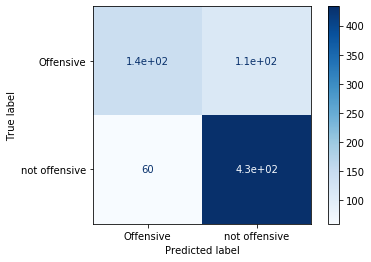

In [32]:
## Split into Train and Test vectors using the vectors of level A and Labels of level A with a training size of 0.75.
train_vectors_level_A, test_vectors_level_A, train_labels_level_A, test_labels_level_A = train_test_split(vectors_level_A[:], labels_level_a[:], train_size=0.70)

## Extracting names of labels and storing them in a variable
classNames = np.unique(test_labels_level_A)

print("Training begins on Level A classification...")
warnings.filterwarnings(action='ignore')

## Creating an object of SVC
classifiersvc = SVC()

#dt = DecisionTreeClassifier()

#dt_param_grid = [{'splitter':['best'], 'max_features': ['auto','100'], 'max_depth': [100,200,500,1000]}]

## Creating a parameter grid using the arguments SVC uses for hyper parameter tuning using GridSearchCV
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

## Creating an object for GridSearchCV with the object of SVC and parameter grid given as parameters
classifierGrid = GridSearchCV(classifiersvc, param_grid, refit = True, verbose=2)

# Model fit
classifierGrid.fit(train_vectors_level_A, train_labels_level_A)

# choosing the best estimator with the help of GridSearchCV
classifierGrid = classifierGrid.best_estimator_
print("Training complete....")


print("calculating accuracy....")
## Training accuracy has been calculated
accuracy = accuracy_score(train_labels_level_A, classifierGrid.predict(train_vectors_level_A))
print("Training Accuracy:", accuracy)

## Predictions are obtained on the test data set
test_predictions = classifierGrid.predict(test_vectors_level_A)

## Testing accuracy has been calculated
accuracy = accuracy_score(test_labels_level_A, test_predictions)
print("Test Accuracy:", accuracy)


print("Confusion Matrix:")
## confusion matrix has been obtained for level A classification
matrix_level_A = confusion_matrix(test_labels_level_A, test_predictions)
print(matrix_level_A)
## Obtaining classification report for the test data set
print(classification_report(test_labels_level_A,test_predictions))

## plotting confusion matrix for better visualization
plottedCM_Level_A = plot_confusion_matrix(classifierGrid, test_vectors_level_A, test_labels_level_A,display_labels=classNames, cmap=plt.cm.Blues)
plt.show()



In [33]:
## Split into Train and Test vectors using the vectors of level A and Labels of level B with a training size of 0.75.
train_vectors_level_B, test_vectors_level_B, train_labels_level_B, test_labels_level_B = train_test_split(vectors_level_B[:], labels_level_b[:], train_size=0.75)

## Extracting names of labels and storing them in a variable
classNames = np.unique(test_labels_level_B)
print("Training begins on Level B classification...")
warnings.filterwarnings(action='ignore')

## Creating an object of SVC
classifiersvc = SVC()

dt = DecisionTreeClassifier()

dt_param_grid = [{'splitter':['best'], 'max_features': ['auto','100'], 'max_depth': [100,200,500,1000]}]

## Creating a parameter grid using the arguments SVC uses for hyper parameter tuning using GridSearchCV
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

## Creating an object for GridSearchCV with the object of SVC and parameter grid given as parameters
classifierGrid = GridSearchCV(classifiersvc, param_grid, refit = True, verbose=2)

# Model fit
classifierGrid.fit(train_vectors_level_B, train_labels_level_B)

# choosing best estimator
classifierGrid = classifierGrid.best_estimator_
print("Training complete....")


print("calculating accuracy....")
## Training accuracy has been calculated
accuracy = accuracy_score(train_labels_level_B, classifierGrid.predict(train_vectors_level_B))
print("Training Accuracy:", accuracy)

## predictions are obtained on the testing data set
test_predictions = classifierGrid.predict(test_vectors_level_B)

## Testing accuracy has been calculated
accuracy = accuracy_score(test_labels_level_B, test_predictions)
print("Test Accuracy:", accuracy)

print("Confusion Matrix:")
## confusion matrix has been obtained for level A classification
matrix_level_B = confusion_matrix(test_labels_level_B, test_predictions)
print(matrix_level_B)
## Obtaining classification report for the test data set
print(classification_report(test_labels_level_B,test_predictions))

## Plotting confusion matrix for better visualization
plottedCM_Level_B = plot_confusion_matrix(classifierGrid, test_vectors_level_B, test_labels_level_B, display_labels=classNames, cmap=plt.cm.Blues)
plt.show()





## Split into Train and Test vectors using the vectors of level A and Labels of level B with a training size of 0.75.
train_vectors_level_C, test_vectors_level_C, train_labels_level_C, test_labels_level_C = train_test_split(vectors_level_c[:], labels_level_c[:], train_size=0.75)

## Extracting names of labels and storing them in a variable
classNames = np.unique(test_labels_level_C)
print("Training begins on Level C classification...")
warnings.filterwarnings(action='ignore')

## Creating an object of SVC
classifiersvc = SVC()

dt = DecisionTreeClassifier()

dt_param_grid = [{'splitter':['best'], 'max_features': ['auto','100'], 'max_depth': [100,200,500,1000]}]

## Creating a parameter grid using the arguments SVC uses for hyper parameter tuning using GridSearchCV
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

## Creating an object for GridSearchCV with the object of SVC and parameter grid given as parameters
classifierGrid = GridSearchCV(classifiersvc, param_grid, refit = True, verbose=2)

# Model fit
classifierGrid.fit(train_vectors_level_C, train_labels_level_C)

# Choosing best estimator
classifierGrid = classifierGrid.best_estimator_
print("Training complete....")


print("calculating accuracy....")
## Training accuracy has been calculated
accuracy = accuracy_score(train_labels_level_C, classifierGrid.predict(train_vectors_level_C))
print("Training Accuracy:", accuracy)

## predictions are obtained on the testing data set
test_predictions = classifierGrid.predict(test_vectors_level_C)

## Testing accuracy has been calculated
accuracy = accuracy_score(test_labels_level_C, test_predictions)
print("Test Accuracy:", accuracy)


print("Confusion Matrix:")
## confusion matrix has been obtained for level A classification
matrix_level_C = confusion_matrix(test_labels_level_C, test_predictions)
print(matrix_level_C)
## Obtaining classification report for the test data set
print(classification_report(test_labels_level_C,test_predictions))

## plotting confusion matrix for better visualization
plottedCM = plot_confusion_matrix(classifierGrid, test_vectors_level_C, test_labels_level_C, display_labels=classNames, cmap=plt.cm.Blues)
plt.show()

Training begins on Level B classification...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


KeyboardInterrupt: 